## Logistic Regression on Hearing Test Data

### part-1: EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/hearing_test.csv")

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

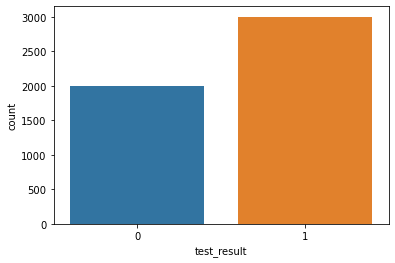

In [6]:
sns.countplot(data=df,x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

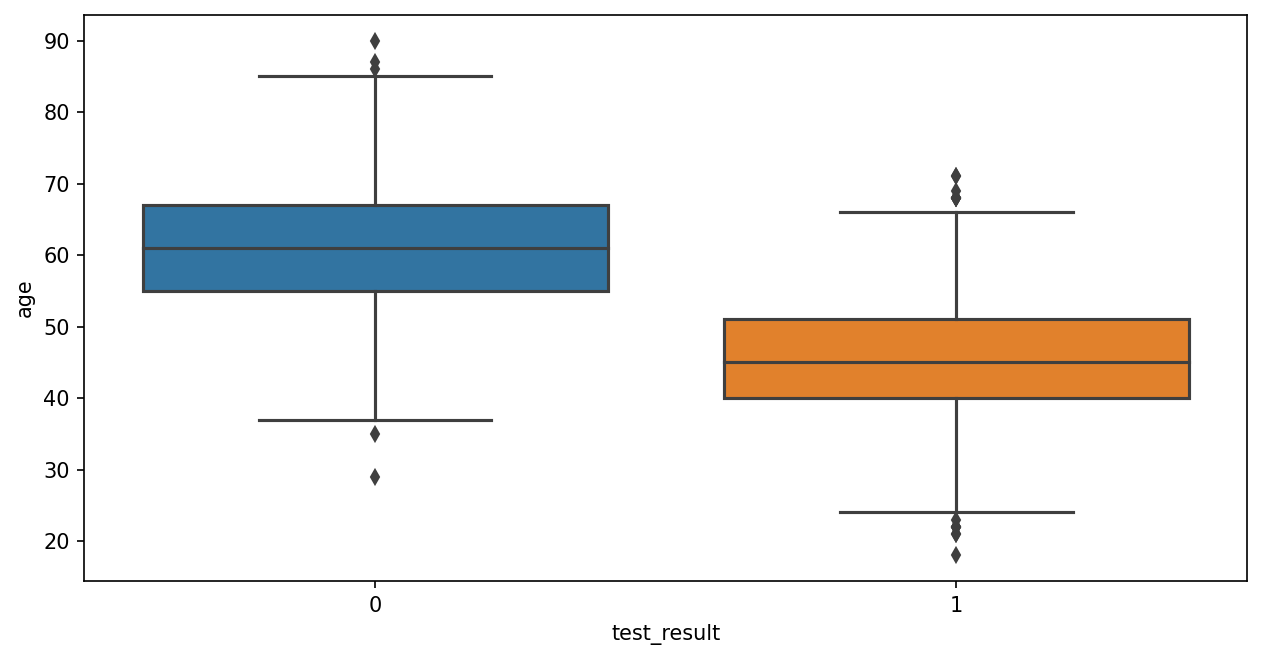

In [7]:
plt.figure(figsize=(10,5),dpi=150)
sns.boxplot(x='test_result',y='age', data=df)

# the trend says, old people are not passing the hearing test

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

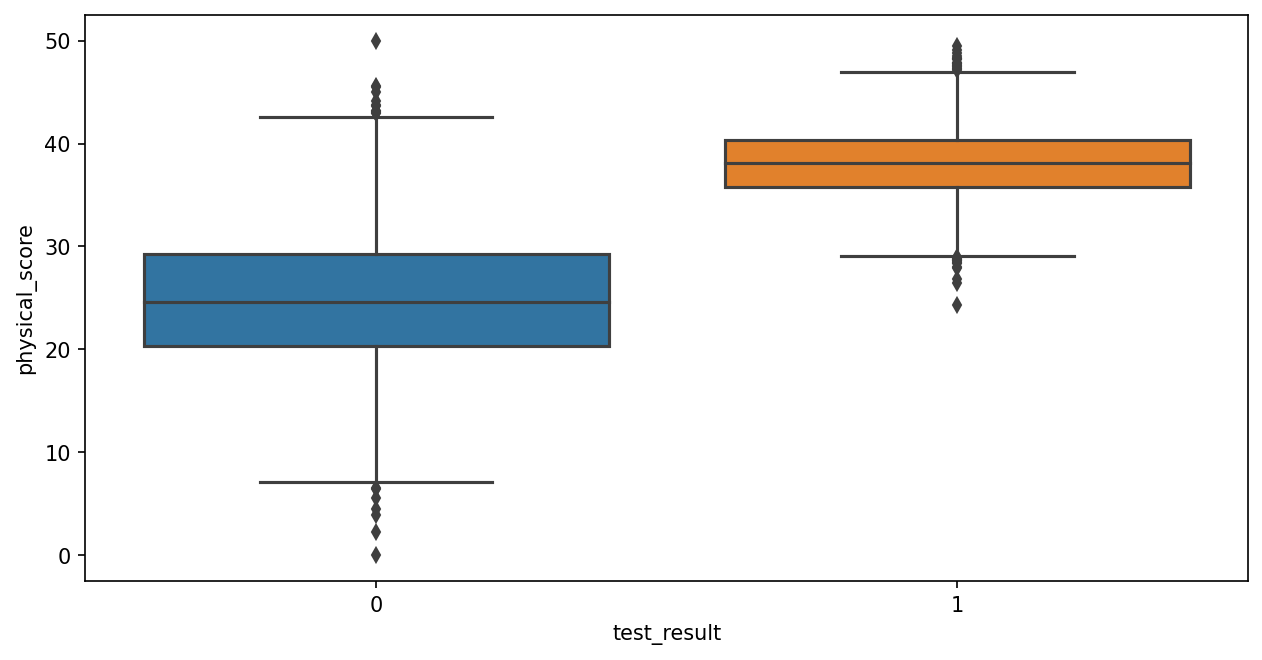

In [8]:
plt.figure(figsize=(10,5),dpi=150)
sns.boxplot(x='test_result',y='physical_score', data=df)

# high physical_score leads to pass the test

<AxesSubplot:xlabel='age', ylabel='physical_score'>

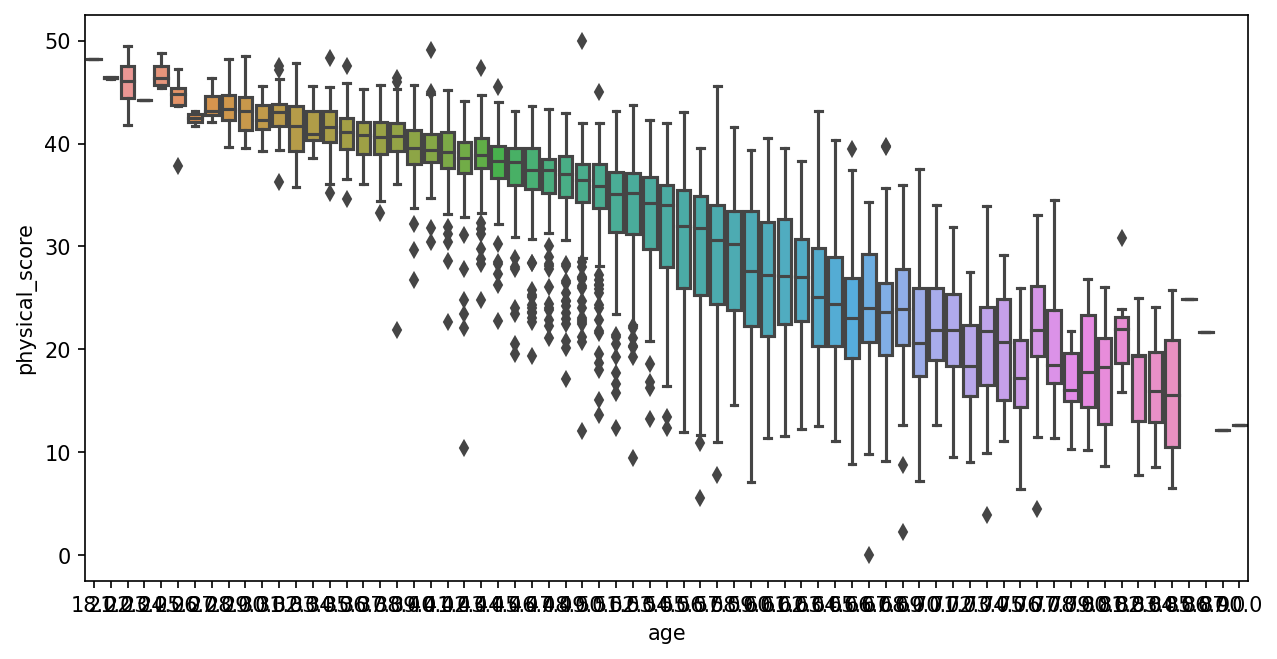

In [9]:
plt.figure(figsize=(10,5),dpi=150)
sns.boxplot(y='physical_score',x='age', data=df)

# as age increases, physical_score decreases

<AxesSubplot:xlabel='age', ylabel='physical_score'>

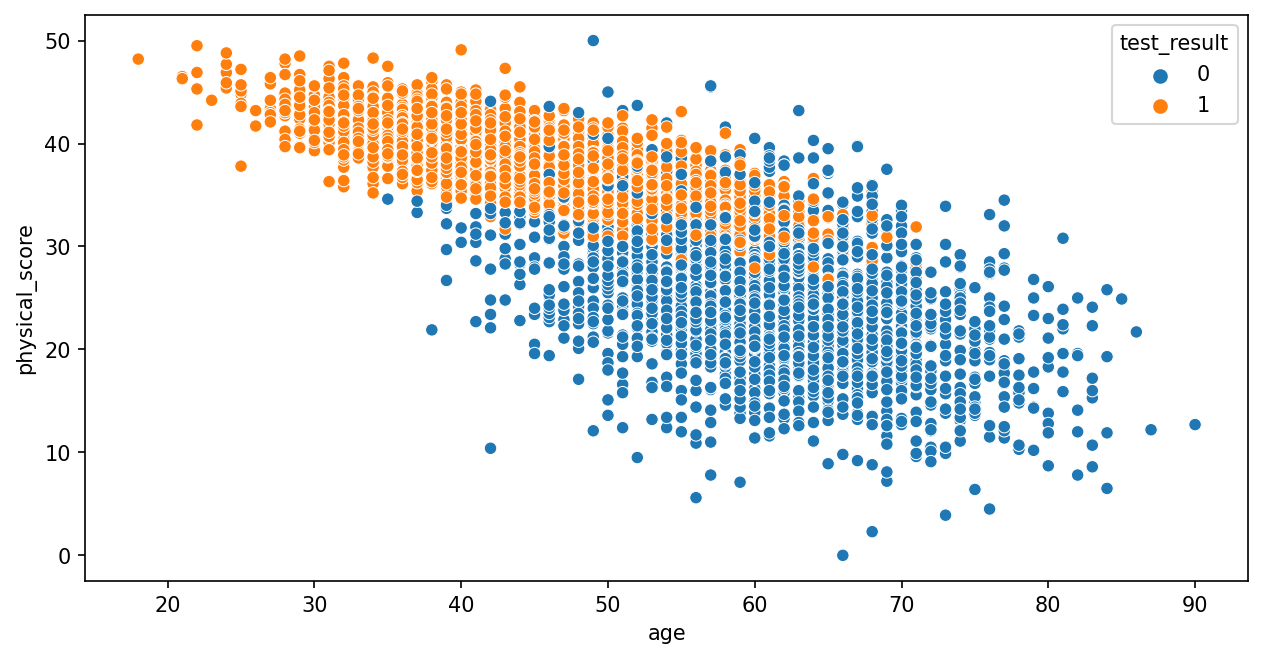

In [10]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(data=df,x='age',y='physical_score',hue='test_result')

# as age increases, physical_score decreases
# people whose age is less are having high physical_score and passing the test

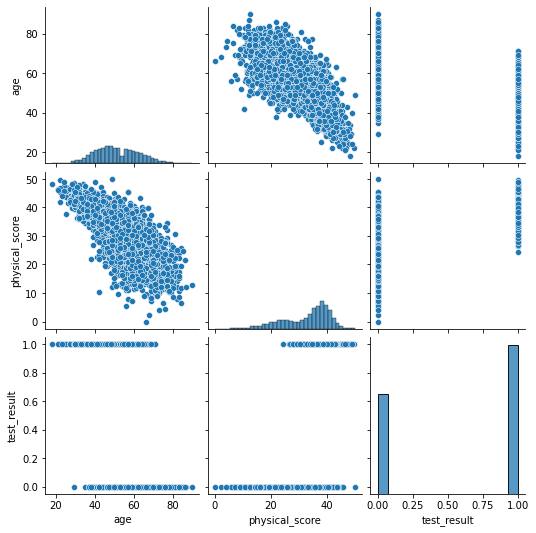

In [11]:
sns.pairplot(data=df)

# not much informative

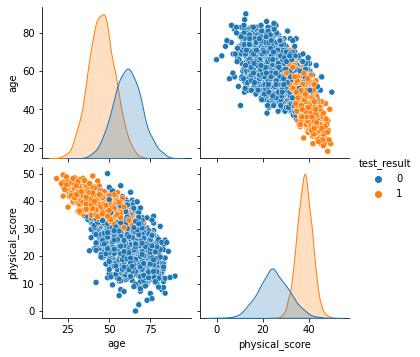

In [12]:
sns.pairplot(data=df,hue='test_result')
# we can see the scatter plots

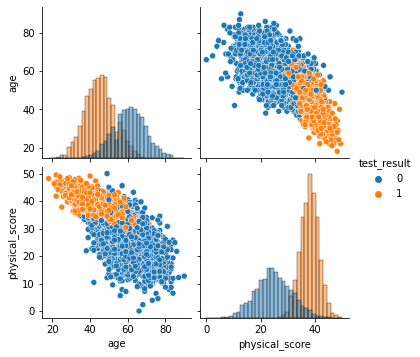

In [13]:
sns.pairplot(data=df,hue='test_result',diag_kind='hist')

# diagonal plots are histograms

<AxesSubplot:>

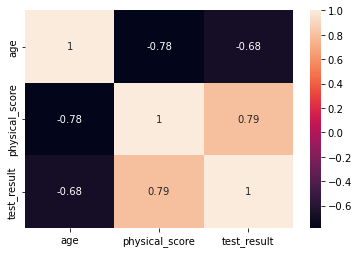

In [14]:
sns.heatmap(data=df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

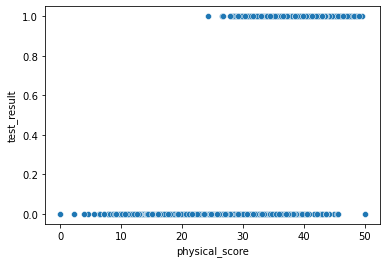

In [15]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

# this plots is NOT INFORMATIVE, instead use boxplot for these labels

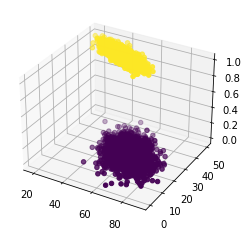

In [16]:
# 3D plot
# since the no.of classes are only 2 (passing test/not), we can see 3D plot
# copied from google search results

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'],c=df['test_result'])

In [17]:
# there is a clear separation b/w passing the exam and not passing the exam
# so, our classification algorithm should work nicely

## Creating and Training a Model

In [18]:
# in this notebook, we are not going to concentrate much on hyper-parameter values
# we are going to go with default values for hyper-parameters, as our goal here ..
# is to understand the logistic regression implementation in scikit-learn

# hyper-parameters tuning will be discussed in multi-class classification

In [19]:
# separate X and Y from i/p data


In [20]:

X = df.drop(['test_result'],axis=1)

y = df['test_result']

In [21]:
X

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [22]:
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

In [23]:
# Train_Test split

# we can perform CV, but to demonstrate logistic reg, 
# we are going with simple train-test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [26]:
# scaling the input data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

In [30]:
## both the above commands can be performed using a single command

# scaked_X_train = scaler.fit_transform(X_train)

In [31]:
scaled_X_test = scaler.transform(X_test)

In [32]:
# Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
# the penalties (L1, L2 and ElasticNet regularization) that we have added..
# to reduce overfitting in linear regression, can be used here also because..
# we will use Gradient Descent here also to get optimum weights

# but for now, we will use default values to understand logistic reg

In [35]:
log_model = LogisticRegression()

In [36]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [37]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [38]:
y_pred = log_model.predict(scaled_X_test)

# y_pred is an array of 0's and 1's

In [39]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [40]:
y_pred_prob = log_model.predict_proba(scaled_X_test)

# if wanna see the probabilities

In [41]:
y_pred_prob

# 1st col represents the probability of class-0 (test fail)
# 2nd col is for class-1(test pass)

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [42]:
# The definitions of Performance metrics is defined at the end of this notebook

### Performance Metrics Calculation

In [43]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [44]:
X.head()

# head of the i/p features

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9


### Observations from Coefficients:
#### the coeff corresponding to 'age' is Negative, which means as the age increases, the odds of belonging to class-1 (test pass) decreases, i.e. as the age increases, the chances of passing the test decreases (negative coeff.)

#### similarly, the coeff corresponding to 'physical_score' is positive, which means as the 'physical_score' increases, the chances of test pass also increases. Both these points were observed in scatter plots.

#### From the coeff.'s we can say that the 'physical_score' is more influencing than 'age' in deciding whether the test is passed or not.

#### Odds of an event with prob 'p' is defined as the chance of the event happening divided by the chance of the event not happening, i.e., odds = p/(1-p)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [46]:
y_pred = log_model.predict(scaled_X_test)

# already calculated above

In [47]:
accuracy_score(y_test, y_pred)

# our logistic model is 93% accurate

0.93

In [48]:
confusion_matrix(y_test,y_pred)

# For confusion matrix we have to supply both actual test and predicted test values

array([[172,  21],
       [ 14, 293]])

In [49]:
# confusion matrix plot

In [50]:
from sklearn.metrics import plot_confusion_matrix

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


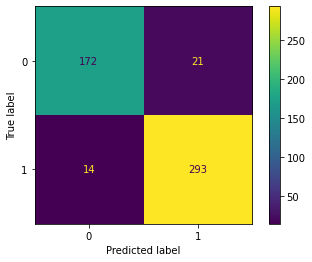

In [51]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

# we have to pass:
#  ML model (here it is logistic reg model)
#  scaled X_test data 
#  y_test data

In [52]:
# classification report gives precision, recall and F1 score

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [54]:
# given dataset in a balanced one, becoz 193 class-0 and 307 class-1
# which means it is NOT like 3% and 97% as discussed in an example earlier

In [55]:
from sklearn.metrics import precision_score, recall_score

In [56]:
precision_score(y_test,y_pred)

0.9331210191082803

In [57]:
recall_score(y_test,y_pred)

0.9543973941368078

In [58]:
# these are for class-1 (passing test)

In [59]:
# ROC Curce

In [60]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


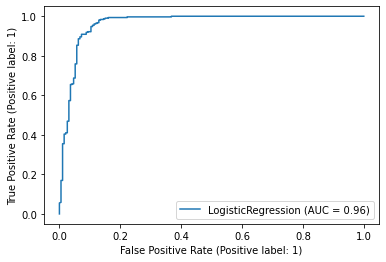

In [61]:
plot_roc_curve(log_model,scaled_X_test,y_test)

In [62]:
# Precision Recall curve

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


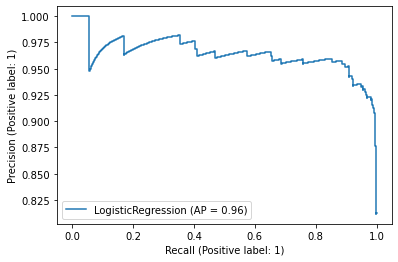

In [63]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [64]:
y_test[0]

# 1st value in test (actual from dataset)

1

In [65]:
log_model.predict(scaled_X_test)[0]

# our model also predicted that it is Test pass (y=1). correct prediction

1

In [66]:
log_model.predict_proba(scaled_X_test)[0]

# prediction in terms of probabilities
# 97.6% chance that it is y=1 and 2.3% chance that it is y=0

array([0.02384343, 0.97615657])

### Performance Metrics of Classification Model

#### why Accuracy alone is not a good metric to test the performance of a classification model?

#### whenever we have imbalanced datasets (i.e. fraud transaction 3% and genuine transaction 97%, in this case, even if we say a given transaction as genuine (without even doing anything), it would be right most of the time. such kind of datasets are called as imbalanced as there is huge diff in % of classes)

#### we need some other metrics namely Precision, Recall (Sensitivity), F1-Score, to deal with such cases.

----
----
----
## Confusion Matrix

----

<img src="confusion-matrix.jpg">

----

Source: https://glassboxmedicine.com/2019/02/17/measuring-performance-the-confusion-matrix/

## Definitions of Performance Metrics

### Accuracy:
#### How often the model is correct.
#### Accuracy = (TP+TN)/Total

### Recall (Sensitivity): 
#### When it is actually positive, how often the model is correct?
#### Recall = TP/Total Actual Positives  = TP/(TP+FN)

### Precision: 
#### When prediction is positive, how often is it correct?
#### Precision = TP/Total Predicted Positives  = TP/(TP+FP)


### F1 Score: 
#### Harmonic mean of precision and recall. the purpose of this metric is that F1 score would become zero if either precision or recall ends up being zero
#### F1 = (2*Precision*Recall) / (Precision+Recall)

In [67]:
# SVM

In [68]:
from sklearn.svm import SVC

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
model = SVC()

param_grid = {'C':[0.01,0.1,1], 'kernel':['linear','rbf']}

In [71]:
grid_model = GridSearchCV(model,param_grid)

In [72]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [73]:
grid_model.best_params_

{'C': 1, 'kernel': 'rbf'}

In [74]:
grid = SVC(C=1, kernel='rbf')

In [75]:
grid.fit(scaled_X_train,y_train)

SVC(C=1)

In [76]:
y_pred_svm = grid.predict(scaled_X_test)

In [77]:
# comparison between Logistic Regresion and SVM

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [79]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       193
           1       0.93      0.98      0.96       307

    accuracy                           0.95       500
   macro avg       0.95      0.94      0.94       500
weighted avg       0.95      0.95      0.95       500



In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [81]:
confusion_matrix(y_test,y_pred_svm)

array([[172,  21],
       [  5, 302]])

In [82]:
# random forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [85]:
rfc.fit(scaled_X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [86]:
y_pred_rfc = rfc.predict(scaled_X_test)

In [87]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       193
           1       0.94      0.93      0.94       307

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [88]:
confusion_matrix(y_test,y_pred_rfc)

array([[174,  19],
       [ 20, 287]])

In [89]:
# decision trees

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
model = DecisionTreeClassifier()

In [92]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [93]:
y_pred_dt = model.predict(X_test)

In [94]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       193
           1       0.91      0.90      0.91       307

    accuracy                           0.89       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.89      0.89      0.89       500



In [95]:
param_grid = {'max_depth':[2,4,6,8], 'max_leaf_nodes': [2,3,5,7,9,11], 
             'min_samples_split':[1,2,5], 'max_features':['auto','sqrt','log2','None'],
             'min_impurity_decrease':[0,0.1,0.2]}

from sklearn.model_selection import GridSearchCV

In [96]:
grid_decision_tree = GridSearchCV(model,param_grid,cv=10)

In [97]:
grid_decision_tree.fit(X_train, y_train)

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4320 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an in

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2', 'None'],
                         'max_leaf_nodes': [2, 3, 5, 7, 9, 11],
                         'min_impurity_decrease': [0, 0.1, 0.2],
                         'min_samples_split': [1, 2, 5]})

In [98]:
grid_decision_tree.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features='auto', max_leaf_nodes=11,
                       min_impurity_decrease=0, min_samples_split=5)

In [99]:
# lets train final model with these optimum hyperparameters

final_model_dt = DecisionTreeClassifier(max_depth=6, max_features='sqrt', 
                                     max_leaf_nodes=11,min_impurity_decrease=0, min_samples_split=5)

In [100]:
final_model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features='sqrt', max_leaf_nodes=11,
                       min_impurity_decrease=0, min_samples_split=5)

In [101]:
y_pred_dt_2 = final_model_dt.predict(X_test)

In [102]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       193
           1       0.91      0.90      0.91       307

    accuracy                           0.89       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.89      0.89      0.89       500



In [103]:
confusion_matrix(y_test,y_pred_dt)

array([[167,  26],
       [ 30, 277]])

In [104]:
confusion_matrix(y_test,y_pred_dt_2)

array([[170,  23],
       [  8, 299]])

In [105]:
# overall, SVM performed well on this dataset